# Setup  Dependencies for Kaggle

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle competitions download -c Spaceship Titanic

In [7]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 106MB/s]


In [8]:
!ls

kaggle.json  sample_data  spaceship-titanic.zip


In [9]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Load in and Do EDA

In [10]:
# !pip install pandas-profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [11]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', 50)

<ipython-input-11-ad8a4fa6acb7>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [12]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Notes:
- Passengers in a group are often are family but not always, >=-02 in the passenger id it means  that it is a group travelling
- Cabin is split via:
Deck/Num/Side
- Side can have:
"p": Port and "s": Starboard
- Luxury amenities:
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck all have numeric format

# Machine Learning Task:
- Predict Transported for people in Test file
- Binary Classification

# To Dos:
- To fill-in missing values in some columns
- Balance out the dataset if imbalanced
- Drop high cardinality columns like 'Name' in the current dataset, which can be irrelevant in helping to find any kind of relationship for the target column (Transported), OR some columns can be considered high Cardinal as they have too much of unique values and are only considered as Identifier Column rather than feature column


In [14]:
profile = ProfileReport(df, title='Spaceship Titanic')

In [ ]:
profile.to_notebook_iframe()

In [ ]:
df[df['Cabin'].isnull()]
# df[df['Cabin'].isna()] (results same as above)

In [ ]:
df[df['Destination'].isna()]

In [ ]:
df['Age'].mean()
df1=df
df1[df1['VIP'].isna()]
# df1.head()

In [ ]:
df.iloc[0]['Cabin'].split('/')[2]
# To iterate through a List stored in a single cell
df1.columns

In [54]:
# def split_cabin(x):
#   try:
#     return str(x).split('/')
#   except:
#     return['Missing', _, 'Missing']

def split_cabin(x):
  if len(str(x).split('/')) < 3:
    return['Missing','Missing', 'Missing']
  else:
    return str(x).split('/')

In [55]:
# Creating a preprocessing function to transform dataset
def preprocessing(df1):
 # Filling missing values in homeplanet with missing 
  df1['HomePlanet'].fillna('Missing', inplace=True)

# CryoSleep - highly correlated - drop na rows
  df1['CryoSleep'].fillna('Missing', inplace=True)

# Cabin preprocessing - extract Deck and Side
  df1['TempCabin1'] = df1['Cabin'].apply(lambda x: split_cabin(x))
  df1['Deck'] = df1['TempCabin1'].apply(lambda x: x[0])
  df1['Side'] = df1['TempCabin1'].apply(lambda x: x[2])

# Dropped TempCabin1 column
  df1.drop(['TempCabin1', 'Cabin'], axis=1, inplace=True)

# Destination Column preprocessing
  df1['Destination'].fillna('Missing', inplace=True)

# Age column preprocessing
  df1['Age'].fillna(df['Age'].mean(), inplace=True)

# VIP column preprocessing - drop na rows
  df1['VIP'].fillna('Missing', inplace=True)

# Monetory spending columns
  df1['RoomService'].fillna(0, inplace=True)
  df1['FoodCourt'].fillna(0, inplace=True)
  df1['ShoppingMall'].fillna(0, inplace=True)
  df1['Spa'].fillna(0, inplace=True)
  df1['VRDeck'].fillna(0, inplace=True)

# Drop Name Column due to High Cordinality
  df1.drop('Name', axis=1, inplace=True)

# Drop Remaining rows
  # df1.dropna(inplace=True)

In [56]:
# Analytical Base Table
abt = df.copy()

In [57]:
abt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [58]:
preprocessing(abt)

In [59]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Modelling
- Feature Target value - X,Y
- OneHotEncoder (function in sklearn) any categorical features
- Train, holdout split
- Train on a bunch of algos


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [61]:
#  OneHotEncoder converts all categorical variables into binary encoded variables, if you got multi-binary then it works slightly well like in the current case
# Create feature columns
# Drop identifier column
X = abt.drop(['Transported', 'PassengerId'], axis=1)

# One Hot Encoding
X = pd.get_dummies(X)

# Create Target columns
y = abt['Transported']

In [62]:
# Create Training and Testing partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

<Axes: xlabel='Transported', ylabel='count'>

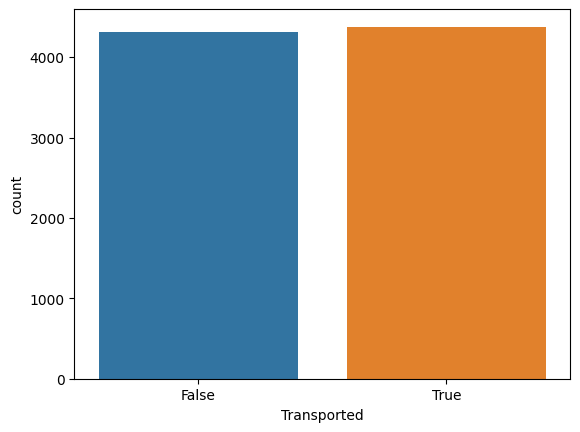

In [63]:
sns.countplot(x='Transported', data=df)

# Setup ML Pipelines
- Importing Algorithm
- Any kind of preprocessing can be done while building the pipelines
- Tune the pipeline using GridSearch CV (Scan across the tuning grid, using the set hyper parametes which can be used for ML Algos and 2nd to perform cross-validation by taking a portion from the training set, its gonna train on it and sub it back)
- Each and everytime we are tuning to get better performance and evaluating on the partition that has been held out for different splits

In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Pipeline:
- Anything that you do prior to your machine learning which can be considered as Workflow
- Preprocessing pipeline: going to be steps that you go and apply on your data before you get to modelling
- Preprocessing -> Training -> Deployment
- Example: ETL tools

In [65]:
# Random Forest
# Gradient Boosted Regressor
# Ridge Regression
# Apply StandardScaling on numeric datatype columns
# Implementing a StandardScaler which is effectively applying z-scoring
# Standard score of a sample x: z=(x-u)/s (u: mean, s: Std Deviation)
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234))
    # 'ridge':
    # 'lasso':
}

- When working with Binary Classification you ideally want your target to be balanced as possible which ensures that you get an accurate and reasonaly well performing model

In [ ]:
# Extract the parameters needed to be tuned
RandomForestClassifier().get_params()

In [67]:
grid = {
    'rf': {
        'randomforestclassifier__n_estimators': [100, 200, 300]
# n_estimators: number of trees in the forest
    },
    'gb': {
        'gradientboostingclassifier__n_estimators': [100, 200, 300]
    }
}

In [68]:
# Create a blank dictionary to hold the models
fit_models={}
# Loop through all the algos
for algo, pipeline in  pipelines.items():
  print(f'Training the {algo} model')
# Create new Grid Search CV class
  model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10)
# Train the model
  model.fit(X_train, y_train)
# Store the results inside of the dictionary
  fit_models[algo] = model

Training the rf model
Training the gb model


In [69]:
for algo, pipeline in pipelines.items():
  print(pipeline)
  # print(algo)

pipelines['rf']
# GridSearchCV??

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1234))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1234))])

# Evaluate Performance on the Test Partition:
- Grab the testing data from the test.csv and evaluate on that testing partition

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [71]:
#  Evaluate the performance of the model
for algo, model in fit_models.items():
  yhat = model.predict(X_test)
  accuracy = accuracy_score(y_test, yhat)
  precision = precision_score(y_test, yhat)
  recall = recall_score(y_test, yhat)
  print(f'Metrics for {algo}: accuracy- {accuracy}, recall- {recall}, precision- {precision}')


# fit_models

Metrics for rf: accuracy- 0.7910276073619632, recall- 0.7646604938271605, precision- 0.8050365556458164
Metrics for gb: accuracy- 0.8075153374233128, recall- 0.8479938271604939, precision- 0.7827635327635327


# Save Best Model

In [72]:
import pickle

In [73]:
with open('gradientboosted.pkl', 'wb') as f:
  pickle.dump(fit_models['gb'], f)
# wb: write binary
# rb: read binary

# with open('gradientboosted.pkl', 'rb') as f:
  # reloaded_model = pickle.load(f)

In [74]:
reloaded_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=1234))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                      300]})

# Predict on Test Data

In [88]:
# Read in test dataset
test_df = pd.read_csv('test.csv')
# Deep copy
abt_test = test_df.copy()
# Run through the preprocessing pipeline
preprocessing(abt_test)
# One Hot Encode categorical variables
abt_test = pd.get_dummies(abt_test.drop('PassengerId', axis=1))

In [ ]:
test_df.columns

In [90]:
len(abt_test.columns)

32

In [92]:
len(X.columns)

32

In [93]:
# test_df.info()
# len(test_df)
# abt_test.info()
# len(abt_test)

In [95]:
yhat_test = fit_models['gb'].predict(abt_test)

In [106]:
submission = pd.DataFrame([test_df['PassengerId'], yhat_test]).T
submission.columns = ['PassengerId', 'Transported']

In [107]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# Submission to Kaggle

In [110]:
submission.to_csv('kaggle_submission.csv', index = False)

In [111]:
!kaggle competitions submit -c spaceship-titanic -m "initial gb model" -f "kaggle_submission.csv"

100% 56.2k/56.2k [00:00<00:00, 108kB/s]
Successfully submitted to Spaceship Titanic